# IT41 Take Home Exam

PLANCHE Antoine

GUILLEUX Céleste


# Exercise I - RSA Cryptosystems And You

The RSA encryption cryptosystem is an asymmetrical encryption system: it uses sets of keys that can be used, one to encrypt a message and one to decrypt an encrypted message. These always come in pair of two: you can only decode a message encrypted with a given public key if you have its corresponding secret key.

The basic mathematical principle behind RSA is as follows : given a large natural n, and a natural m that is smaller than n, then we find (e, d) != (1, 1) such that:

$$(m^{d})^{e} \equiv (m^{e})^{d} \equiv m (\bmod n)  $$

Then, if we can keep d secret, then we can use a set (e, n) to be used as a public key, and (d, n) to be used as a secret key. 

RSA key generation therefore aims at finding values of n, e, d for which the above equation is true, while remaining secure against attack from an outside influence.

It so happens that while multiplicating large numbers is relatively easy for a computer, factoring large numbers is a very difficult endeavor, and is in fact almost impossible should one attempt to divide it in prime factors.
No algorithms currently exist that can solve this problem in polynomial time on current computers.

Therefore, the ideal n for a cryptography system should be a factor of two very large prime numbers, so as to make it very hard to compute the secret key even when given the public key.

***

The first step will be to calculate the two distinct prime numbers we will be using.
While it is very difficult to figure out a complete and definitive list of prime numbers, it is comparatively much easier to figure out whether a randomly determined number is very likely prime or not.
Indeed, in RSA systems it is common to use Fermat's little theorem, which states that for p prime and a non-divisible by p:

$$a^{p-1} \equiv 1 (\bmod p)$$

This property is true for all prime numbers. However, it is also true for a very small proportion of composite (non-prime) numbers, called pseudo-primes or Fermat liars; in most cases testing the equation for different values of a will reveal their composite nature.
This property can be tested in reasonable times using modular exponentiation techniques.


Finding our prime numbers is then a matter of selecting random large integers and testing them against Fermat's little theorem; this is a relatively reliable way of finding high prime numbers in polynomial time.



Once two prime numbers p and q have been found, they are multiplicated as n = pq.

The following operation is performed: $λ( n) = \phi (p ) * \phi ( q ) = ( p-1 ) ( q-1 )$

The following operation is performed: $λ( n) = \phi (p ) * \phi ( q ) = ( p-1 ) ( q-1 )$

Once that's done, one must select an integer e so that $1 < e < λ ( n ) $
; that integer must also be coprime with  λ(n). Then one must calculate its inverse modulo  λ(n), e.g. $e*d \equiv 1 ( mod λ(n) )$


We now have the elements necessary to construct our RSA keys. 
The public key is (e, n), and will usually be used to encrypt messages. This one can be sent by its owner to anyone they wish to receive messages from, or made available through some other means.
The private key is (d, n) and it will usually be used to decrypt messages. Only the owner of the key set must know that key.



To illustrate, here is an example using 61 and 53 as prime numbers:

In [4]:
 
def gcd(m,n): 
    if n==0: 
        return m 
    else: 
        return gcd(n,m%n) 

def gcdExtended(a, b): 
    if a == 0 :  
        return b,0,1
             
    gcdv,x1,y1 = gcdExtended(b%a, a) 
     
    x = y1 - (b//a) * x1 
    y = x1 
     
    return gcdv,x,y
    
    
# Prime numbers used
p = 61
q = 53

    
# First we determine base values
n = p*q
lamb = (p-1)*(q-1)

# Determining e: it's fine if e is a small value (however ideally d should be relatively large!)
for e in range(2, lamb):
    if gcd(e,lamb)== 1: 
        break

# We then determine d from e
x1, x2, x3 = gcdExtended(e, lamb)
d = x2 % lamb
     

print('Public key is (' + str(e) +', '+ str(n) +')')
print('Private key is (' + str(d) +', '+ str(n) +')')

Public key is (7, 3233)
Private key is (1783, 3233)


***


### RSA encryption process

Once keys are generated, they are ready to be used to encrypt and decrypt messages.
Assume one wishes to encrypt a piece of data using a set of RSA keys belonging to the recipient:
 (e, n) the public key, and (d, n) the private key.

First, the media that must be encrypted1 is converted into one or several numbers M so that M < n. 
Each of these numbers is then encrypted using the public key:
$$T = M^e (\bmod n)$$


The encrypted messages can then be sent over the network. Upon reception, the recipient will be able to decrypt the received message using the secret key:

$$ T^d \equiv M^{ed} \equiv M(\bmod n)$$


Thus the message is decrypted, and can be translated from numbers to text.

Additionally, assymetrical encryption systems such as RSA can be used to generate signatures, which allow the recipient to verify the identity of a sender. It requires both parties to know each other's public keys.

Since $( m^d )^e \equiv (m^e)^d (\bmod n)$, if you encrypt a message with your own private key, anyone can decode that message using your public key. A common procedure is therefore to encrypt your message m with the public key of the recipient, then encrypt the result with your private key.
Upon receiving a signed message, the recipient simply decrypts the message with the sender's public key, then decrypts the result with their private key.

Let us try out encryption and decryption process right now with an example algorithm! We will use the values calculated in the precedent example.

In [9]:
n = 3233
e = 7
d = 1783

# Base message m should be less than 3233

m = 800
print('Base message is ' + str(m))

encrypted = pow(m, e) % n
print('Encrypted message is ' + str(encrypted))

decrypted = pow(encrypted, d) % n
print('Decrypted message is ' + str(decrypted))

Base message is 800
Encrypted message is 2971
Decrypted message is 800


***

### Time efficiency study

We will try out our last algorithms again, but with much larger prime factors. For convenience, the prime numbers used will be generated directly by Python. We will recover the time it takes for our example algorithm to go through the key generation, then the encryption/decryption process.


In [1]:
import time
import decimal


def gcd(m,n): 
    if n==0: 
        return m 
    else: 
        return gcd(n,m%n) 

def gcdExtended(a, b): 
    if a == 0 :  
        return b,0,1
             
    gcdv,x1,y1 = gcdExtended(b%a, a) 
    
    x = y1 - (b//a) * x1 
    y = x1 
     
    return gcdv,x,y

curtime = time.time();
    
# Prime numbers used
p = 613
q = 1279

    
# First we determine base values
n = p*q
lamb = (p-1)*(q-1)

e = decimal.Decimal(0)
d = decimal.Decimal(0)

# Determining e: it's fine if e is a small value (however ideally d should be relatively large!)
for e in range(3, lamb):
    if gcd(e,lamb)== 1: 
        break

# We then determine d from e
x1, x2, x3 = gcdExtended(e, lamb)
d = x2 % lamb

print('Public key is (' + str(e) +', '+ str(n) +')')
print('Private key is (' + str(d) +', '+ str(n) +')')

m = 800
print('Base message is ' + str(m))

encrypted = pow(m, e) % n
print('Encrypted message is ' + str(encrypted))

decrypted = pow(encrypted, d) % n
print('Decrypted message is ' + str(decrypted))

print('This loop took ' + str(time.time() - curtime) + ' seconds to complete')


Public key is (5, 784027)
Private key is (625709, 784027)
Base message is 800
Encrypted message is 130670
Decrypted message is 800
This loop took 1.2910740375518799 seconds to complete


We see here that this attempt alone took more than one second to complete, despite using relatively low prime numbers! RSA encryption systems are notoriously slow, and ill-fitted for the encryption of large chunks of data. However, they allow for exchange of shared keys for less consuming encryption systems in a very secure fashion. Also bear in mind that while this version of the algorithm is very slow, actual implementations are much more optimized and efficient, meaning you wouldn't run into one-second processes on such small prime numbers.

***

### Proof of encryption/decryption algorithm

We want to prove that the encryption and decryption algorithm is working as intended. Since the base functions used here (extended euclidian, pow, etc.) are alreadt proven, we are really trying to prove that the RSA keygeneration method indeed generates e, d from p, q different prime numbers that will fill the following condition, for m < n:

$$(m^{d})^{e} \equiv m (\bmod n)\equiv m (\bmod pq)  $$

Since λ(pq) = (p − 1)(q − 1) is divisible by p-1 and q-1, then there has to exist naturals r, s for which

$$ed − 1 = r ( p − 1 ) = s ( q − 1 )$$


We also know that two numbers a and b are congruent mod (pq) if and only if they are congruent mod(p) and mod(q).

To show $m^{ed} \equiv m (\bmod p)$, two cases can exist:

- either m is divisible by p, in which case $m^{ed} \equiv 0 \equiv m^{ed} (\bmod p)$
- or m is not divisible by p, in which case we have this:

$$m^{ed} = m^{ed - 1}m = m^{r(p-1)}m = (m^{p-1})^{r}m \equiv 1^{r}m \equiv m (\bmod p)$$ 

proving therefore that $m^{ed} \equiv m (\bmod p).$

Proving $m^{ed} \equiv m (\bmod q).$ is made through the exact same process: either m is dividible by q, and then $m^{ed} \equiv 0 \equiv m^{ed} (\bmod q)$, or 
$$m^{ed} = m^{ed - 1}m = m^{r(q-1)}m = (m^{q-1})^{r}m \equiv 1^{r}m \equiv m (\bmod q)$$ 

Consequently, $(m^{d})^{e} \equiv m (\bmod pq)$, proving the validity of the RSA algorithm.

***

### RSA limitations

While RSA is a robust encryption algorithm that is widely used for data security worldwide, it is not without its pitfalls.

First off, as the encryption/decryption process is slow when compared to other methods, RSA is generally used to exchange text documents and short messages.
As such, it is common to use RSA to securely exchange shared secret keys for a symmetric-key encryption method that will be more efficient when it comes to encrypting and decrypting larger chunks of data, such as pictures or videos.

Additionally, there exists methods that can allow one to break RSA encryption given the right opportunities or relevant access (common modulus attack, timing attack...)

One example of such an attack would be based upon the signature process, which has been lightly touched on earlier.

Let us assume an attacker wants to decrypt a message M encoded with a receiver's public key (e, n). If this attacker can trick the receiver into signing the encoded message with their secret key, they will be able to receive the message decoded. However that receiver is likely to realize they are essentially asked to decode their own message.

Now, assume a, b two integers so that a < n and $a.b \equiv 1 (\bmod n)$. Then the attacker can turn $M^e$ into $aM^e (\bmod n)$, and send that new message to the receiver to be signed.
The attacker will then receive $a^dM^{de} \equiv a^dM$ ; because of the a factor, the message will not be as obviously decoded.
They then only need to decrypt this using the receiver's public key and multiply by the calculated modular inverse, b: 
$$a^{de}bM \equiv abM \equiv M (\bmod n)$$
therefore decoding the message.

This is why it is important to be careful about the documents you sign.

#### Quantum algorithms

Quantum computers are much more efficient at dealing with factorization problems than classical ones.
An example would be Shor's algorithm, written in 1994, which can factor a given integer in polynomial time $O(b^3)$, with b the input size in bits.
While such a performance is impressive when compared to computation time on classical machines, it should be noted that current quantum computers are yet in experimental stage and cannot accept large imputs such as the very large numbers used in the RSA cryptosystems.

However, one should expect that once quantum computers become able to work on such numbers, RSA cryptosystems will no longer be considered secure (as they will be easily crackable compared to the millions of years it could take currently) and that systems using them will have to turn to alternatives. Perhaps quantum computing itself could fill that gap by furnishing new cryptography methods.

***



# Exercise II - Sorting algorithms and Introsort

<p>In this part we will go into detail on internal functionning of Introsort, something of a mix between quicksort and heap sort.<p>

To run this algorithm, as a first step, we need to compute the max depth of the table A that we receive.
<br/>The max depth is computed by : $$maxDepth = [\log{(length(A))}]\times2$$

<p>The idea of this algorithm is to use the quicksort algorithm in the first time and for each step of the problem's division (this is a divide and conquer algorithm), we remove 1 from maxdepth. When maxDepth arrives to 0, we switch to heapsort.
<br/>Therefore maxDepth represents maximum recursion depth., This ensure that worst-case time complexity is $\mathcal{0}(n\log{}n)$
<br/> Indeed, while quicksort is on average quite fast, its worst case complexity is still $\mathcal{0}(n^{2})$ whereas the worst case complexity of heapsort is $\mathcal{0}(n\log{}n)$<p>


### QuickSort

<p>QuickSort is among the most famous and used sorting algorithms. It is a divide and conquer algorithm.
<br/>We choose at random a pivot from the table section $T$ we receive and we place this pivot at the right place in the table by placing all the upper element after and all the lower elements before.
<br/>After that we recursively call quicksort two times:<p>
<ul>
    <li>$quicksort(T[1,..,i_{pivot-1}])$</li>
    <li>$quicksort(T[i_{pivot+1},size(T)])$</li>

</ul>

<p>Eventually, every element of the table will have been chosen as a pivot, and the table will be sorted.<p>

<p> The average complexity of this algorithm is: $T_{quicksort}(n:number\ of\ element)	\in{\mathcal{0}(n\log{}n)}$ but in the worst case, we have: $T_{quicksort}(n:number\ of\ element)	\in{\mathcal{0}(n^{2})}$<p>

In [3]:
def quickSort(Table):
    if not table:
        return []
    else:
        pivot = table[-1] # We arbitrarily choose the first element as pivot
        smallerTable = [x for x in Table if x < pivot] # Here , we use divide and conquer stategy, it amounts to split the table in two and place around the pivot
        BiggerTable = [x for x in Table if x >= pivot]
        return quickSort(smallerTable) + [pivot] + quickSort(biggerTable) # We place pivot in the right place and we rebuild the table



### HeapSort

<p>The idea behind this algorithm is to create a binary tree from the table $T$ we receive.
<br/>An element of index $n$ has two children, the right child wich is the element of index $2n$ and the left child wich is the element of index $2n+1$. <br/>We shall turn this binary tree into a heap, namely a binary tree which respects the following properties:<p>
<ul>
    <li>the maximum difference of depth between two leaves is 1.</li>
    <li>the leaves of maximum depth are "heaped" on the left".</li>
    <li>each node has a higher value than its children.</li>
</ul>

<p>For convenience, we represent our tree by a table.
<br/>The basic operation is called "sifting" which consists of taking a small tree (one node with two children) and sorting this tree.
<br/>We start the algorithm by sifting the root of each "subtree" from bottom to the top and from the left to the right.
<br/>After this step, called inital sifting. We switch the last element of the "table" with the root and we restart the sifting from the bottom to the top and from the left to the right.
<br/> We restart these two operations: switching and sifting until the table is sorted.

<p> The complexity of this algorithm is: $T_{heapsort}(n:number\ of\ element)	\in{\mathcal{0}(n\log{}n)}$<p>

In [46]:
def sifting(tree, node, n):
    k = node
    j = 2 * k
    while j <= n:
        if j < n and tree[j] < tree[j+1]:
            j += 1
        if tree[k] < tree[j]:
            tree[k],tree[j] = tree[j],tree[k]
            k = j
            j = 2*k
        else:
            j = n + 1
    return


def heapSort(tree):
    for i in range(len(tree)//2-1,-1,-1):
        sifting(tree, i, len(tree)-1)
    for i in range(len(tree)-1,0,-1):
        tree[i],tree[0] = tree[0],tree[i]
        sifting(tree, 0, i-1)
    return tree

[1, 2, 3, 3, 4, 5, 15, 2845]


### Implementation IntroSort, MergeSort, SelectionSort and plot their times complexity curves

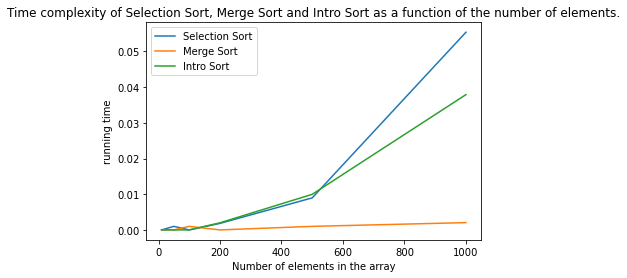

In [126]:
import math
import random
import time
import matplotlib.pyplot as plt

#allow us to generate an unsorted array

def createRandomUnSortedList(num, start = 1, end = 1000): 
    arr = [] 
    tmp = random.randint(start, end) 

    for x in range(num): 

        while tmp in arr: 
            tmp = random.randint(start, end) 

        arr.append(tmp) 

    return arr

#IntroSort

def partition(Table, firstIndex, lastIndex):
    pivot = Table[firstIndex]
    i = firstIndex -1
    j = lastIndex
 
    while True:
        i = i + 1
        while Table[i] < pivot:
            i = i + 1
        j = j - 1
        while Table[j] > pivot:
            j = j - 1
        if i >= j:
            return j
        Table[i], Table[j] = Table[j], Table[i]


def max_heapify(Table, index, firstIndex, lastIndex):
    def left(i):
        return 2*i + 1
    def right(i):
        return 2*i + 2
 
    size = lastIndex - firstIndex
    l = left(index)
    r = right(index)
    if (l < size and Table[firstIndex + l] > Table[firstIndex + index]):
        largest = l
    else:
        largest = index
    if (r < size and Table[firstIndex + r] > Table[firstIndex + largest]):
        largest = r
    if largest != index:
        Table[firstIndex + largest],Table[firstIndex + index] = Table[firstIndex + index],Table[firstIndex + largest]
        max_heapify(Table, largest, firstIndex, lastIndex)

def build_max_heap(Table, firstIndex, LastIndex):
    def parent(i):
        return (i - 1)//2
    length = LastIndex - firstIndex
    index = parent(length - 1)
    while index >= 0:
        max_heapify(Table, index, firstIndex, LastIndex)
        index = index - 1

def heapsort(Table, firstIndex, lastIndex):
    build_max_heap(Table, firstIndex, lastIndex)
    for i in range(firstIndex - 1, lastIndex, -1):
        Table[i], Table[firstIndex] = Table[firstIndex], Table[i]
        max_heapify(Table, index=0, firstIndex=firstIndex, lastIndex=lastIndex)

def introSortHelper(Table,firstIndex, lastIndex, maxDepth): #this function sorts the table from firstIndex to lastIndex - 1 included
    if lastIndex - firstIndex <= 1: # the function returns the result only if the table's length is greater than 1
        return
    elif maxDepth == 0: #we begin to use heapsort instead quicksort when maxdepth = 0
        return heapSort(A, firstIndex, lastIndex)
    else: # this part is the same that a quicksort
        p = partition(Table, firstIndex, lastIndex) # allow us to choose a pivot (element of index firstIndex) and to place it at the right place
        introSortHelper(Table, firstIndex, p + 1, maxDepth -1) #recursive call
        introSortHelper(Table, p + 1, lastIndex, maxDepth - 1)

def introSort(Table): #allow to compute maxDepth
    start_time = time.time()
    maxDepth = math.log(len(Table)) * 2
    introSortHelper(Table,0, len(Table), maxDepth)
    tableTimeIntroSort.append(time.time() - start_time)
    
#MergeSort

def mergeSort(A):
    start_time = time.time()
    mergeSortHelper(A)
    tableTimeMergeSort.append(time.time() - start_time)


def mergeSortHelper(A): # we define two functions to avoid issues with the recursion and the array tableTimeMergeSort.

    if len(A) > 1:
        mid = len(A)//2
        B = A[:mid]
        C = A[mid:]
        mergeSortHelper(B)
        mergeSortHelper(C)
        
        #merge between two sorted array
        
        i = 0
        j = 0
        k = 0
        while i < len(B) and j < len(C):
            if B[i] < C[j]:
                A[k] = B[i]
                i = i+1
            else:
                A[k] = C[j]
                j = j+1
            k = k+1
        
        while i < len(B):
            A[k] = B[i]
            i = i+1
            k = k+1
        while j < len(C):
            A[k] = C[j]
            j = j+1
            k = k+1

#SelectionSort

def selectionSort(X):
    start_time = time.time()
    for i in range(len(X)):
        min = i
        for j in range(i+1,len(X)):
            if X[j] < X[min]:
                min = j
        if min != i:
            temp = X[i]
            X[i] = X[min]
            X[min] = temp
    tableTimeSelectionSort.append(time.time() - start_time)
    return X

tableNumberOfElement = [10,50,100,200,500,1000]
tableTimeSelectionSort = []
tableTimeMergeSort = []
tableTimeIntroSort = []
for i in range(len(tableNumberOfElement)):
    T = createRandomUnSortedList(tableNumberOfElement[i])
    selectionSort(T)
    mergeSort(T)
    introSort(T)
plt.plot(tableNumberOfElement, tableTimeSelectionSort, label = "Selection Sort")
plt.plot(tableNumberOfElement, tableTimeMergeSort, label = "Merge Sort")
plt.plot(tableNumberOfElement, tableTimeIntroSort, label = "Intro Sort")
plt.legend()
plt.xlabel("Number of elements in the array")
plt.ylabel("running time")
plt.title("Time complexity of Selection Sort, Merge Sort and Intro Sort as a function of the number of elements.")
plt.show()



As we can see for our sample, MergeSort seems to be the most efficient, followed by IntroSort and finally the Selection sort . It is a little weird because MergeSort and IntroSort are supposed to give similar results.

### Difference between IntroSort, MergeSort and SelectionSort

<p>As said before, IntroSort is based on two sorting algorithms: QuickSort and HeapSort.
<br/>These two algorithms, like MergeSort use the divide and conquer stategy.
<br/>MergeSort splits its array in half at each step and merges those sorted arrays, whereas Quicksort divides its array around the index of the pivot and has already sorted its pivot. So, there is a difference in the order of operations.
<br/>The time complexity between Introsort and Mergesort is also the same. ($\mathcal{0}(n\log{}n)$)
<br/>On the other hand, there are nothing in common between IntroSort and SelectionSort. This two algorithms are based on different stategy. We can say that SelectionSort is an intuitive way to sort an array while IntroSort uses a more elaborate and non-intuitive way to sort an array.
<br/>The time complexity of Selectionsort ($\mathcal{0}(n^{2})$) is also much larger than Introsort's ($\mathcal{0}(n\log{}n)$).<p>


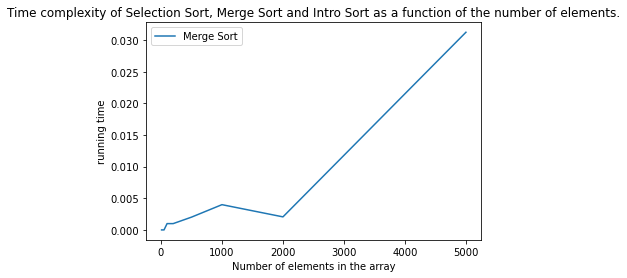

In [106]:
import math
import random
import time
import matplotlib.pyplot as plt


#allow us to generate an unsorted array

def createRandomUnSortedList(num, start = 1, end = 5000): 
    arr = [] 
    tmp = random.randint(start, end) 

    for x in range(num): 

        while tmp in arr: 
            tmp = random.randint(start, end) 

        arr.append(tmp) 

    return arr


def mergeSort(A):
    start_time = time.time()
    mergeSortHelper(A)
    tableTimeMergeSort.append(time.time() - start_time)


def mergeSortHelper(A): # we define two functions to avoid issues with the recursion and the array tableTimeMergeSort.

    if len(A) > 1:
        mid = len(A)//2
        B = A[:mid]
        C = A[mid:]
        mergeSortHelper(B)
        mergeSortHelper(C)
        
        #merge between two sorted array
        
        i = 0
        j = 0
        k = 0
        while i < len(B) and j < len(C):
            if B[i] < C[j]:
                A[k] = B[i]
                i = i+1
            else:
                A[k] = C[j]
                j = j+1
            k = k+1
        
        while i < len(B):
            A[k] = B[i]
            i = i+1
            k = k+1
        while j < len(C):
            A[k] = C[j]
            j = j+1
            k = k+1
            
tableNumberOfElement = [10,50,100,200,500,1000,2000,5000]
tableTimeMergeSort = []
for i in range(len(tableNumberOfElement)):
    T = createRandomUnSortedList(tableNumberOfElement[i])
    mergeSort(T)
plt.plot(tableNumberOfElement, tableTimeMergeSort, label = "Merge Sort")
plt.legend()
plt.xlabel("Number of elements in the array")
plt.ylabel("running time")
plt.title("Time complexity of Selection Sort, Merge Sort and Intro Sort as a function of the number of elements.")
plt.show()

***

# Exercise III - Product of matrices of special shape

A T-matrix has the following form:

$$
\begin{pmatrix}
a & b_1 & b_2 & ... & ... & b_n \\
c_1 & a & b_1 & b_2 & ... & b_{n-1}\\
c_2 & c_1 & a & b_1 & ... & b_{n-2}\\
c_3 & c_2 & c_1 & a & ... & b_{n-3}\\
. & . & . & . & . & . \\
c_n & c_{n-1} & c_{n-2} & ... & ... & a
\end{pmatrix} 
$$


1) Prove that the sum of two T-matrices is a T-matrix

For simplicty's sake, we pose $d = a + a', e_k = b_k + b_k', f_k = c_k + c_k'$. Then:

$$
\begin{pmatrix}
a & b_1 & b_2 & ... & ... & b_n \\
c_1 & a & b_1 & b_2 & ... & b_{n-1}\\
c_2 & c_1 & a & b_1 & ... & b_{n-2}\\
c_3 & c_2 & c_1 & a & ... & b_{n-3}\\
. & . & . & . & . & . \\
c_n & c_{n-1} & c_{n-2} & ... & ... & a
\end{pmatrix}  + \begin{pmatrix}
a' & b_1' & b_2' & ... & ... & b_n' \\
c_1' & a' & b_1' & b_2' & ... & b_{n-1}'\\
c_2' & c_1' & a' & b_1' & ... & b_{n-2}'\\
c_3' & c_2' & c_1' & a' & ... & b_{n-3}'\\
. & . & . & . & . & . \\
c_n' & c_{n-1}' & c_{n-2}' & ... & ... & a'
\end{pmatrix}  = \begin{pmatrix}
d & e_1 & e_2 & ... & ... & e_n \\
f_1 & d & e_1 & e_2 & ... & e_{n-1}\\
f_2 & f_1 & d & e_1 & ... & e_{n-2}\\
f_3 & f_2 & f_1 & d & ... & e_{n-3}\\
. & . & . & . & . & . \\
f_n & f_{n-1} & f_{n-2} & ... & ... & d
\end{pmatrix}
$$

which is also a T-matrix.

But then, is the product of two T-matrices a T-matrix?

let's suppose we have: 
$$
\begin{pmatrix}
a & b_1 & b_2 & ... & ... & b_n \\
c_1 & a & b_1 & b_2 & ... & b_{n-1}\\
c_2 & c_1 & a & b_1 & ... & b_{n-2}\\
c_3 & c_2 & c_1 & a & ... & b_{n-3}\\
. & . & . & . & . & . \\
c_n & c_{n-1} & c_{n-2} & ... & ... & a
\end{pmatrix} \times \begin{pmatrix}
a & b_1 & b_2 & ... & ... & b_n \\
c_1 & a & b_1 & b_2 & ... & b_{n-1}\\
c_2 & c_1 & a & b_1 & ... & b_{n-2}\\
c_3 & c_2 & c_1 & a & ... & b_{n-3}\\
. & . & . & . & . & . \\
c_n & c_{n-1} & c_{n-2} & ... & ... & a
\end{pmatrix} = (a_{i,j})_{0\leq{i}\leq{n}~and~0\leq{j}\leq{n}}
$$

if the product of two T-matrices is a T-matrices, we are supposed to have : $ a_{1,0} = a_{2,1} $

let's compute  $ a_{1,0} $ and $ a_{2,1} $:

$ a_{1,0} = 2ac_{1} + \sum\limits_{i=2}^n b_{i-1}c_{i}$

$ a_{2,1} = b_{1}c_{2} + 2ac_{1} + \sum\limits_{i=2}^{n-1} b_{i-1}c_{i}$

We notice that $ a_{1,0} \ne a_{2,1} $.
<br/>Therefore it is not a T-matrix.
<br/>We deduce from this that the product of two T-matrices isn't a T-matrix.




2) Propose a representation of a T-matrix such that the sum of two T-matrices can be calculated in O(n).

The recurring pattern of T-matrices allow one to see that they are in fact composed of repeating instances of the same numbers: $a$, $b_1$ to $b_n$, $c_1$ to $c_n$. Therefore elements can be added only across one instance of each repeating element, meaning one only needs to perform 2n+1 additions if they consider the matrix as $$\begin{pmatrix}
b_n\\
...\\
b_1\\
a\\
c_1\\
...\\
c_n
\end{pmatrix}$$


Indeed, a simple one-dimensional vector of size 2n+1 can fit each element of a T-matrix of size n. Knowing the recurring patterns of a T-matrix, one is able to deduce the complete matrix from this more compact vector.




3) Let A be a T-matrix.  

One considers the following representation of A as a polynomial of degree 2n+ 1:
$$p_A(x) =c_n+c_{n−1}x + c_{n−2}x^2+···+c_1x^{n−1}+ax^n+b_1x^{n+1}+b_2x^{n+2}+···+b_nx^{2n+1}$$

Let  us  now  consider $$ V = \begin{pmatrix} v_0\\v_1\\...\\v_n\end{pmatrix}$$ a n+1 dimensional  vector  and  let  us represent V as a polynomial of degree n: $ p_{V}(x) = v_n+v_{n−1}x+v_{n−2}x2+. . . +v_{0}xn $.

(a)Computing AV gives something like: $$AV = \begin{pmatrix}
av_0 + b_{1}v_1 + ... + b_{n}v_{n}\\
c_{1}v_0 + av_1 + b_{1}v_2 + ... + b_{n-1}v_{n}\\
...\\
c_{n}v_{0} + c_{n-1}v_1 + ... + av_n
\end{pmatrix}$$

When we multiply $ p_a(x).p_{v}(x) $, we obtain a polynomial of degree 3n+1.
<br/>Let's call this polynomial P.
$$ P(x) = a_o + a_{1}x^{1} + ... + a_{3n+1}x^{3n+1} $$

We notice easily that AV is given by the coefficients $a_{2n}$ to  $a_{n}$.
<br/>In other word, $$AV = \begin{pmatrix}
a_{2n}\\
a_{2n-1}\\
...\\
a_{n}
\end{pmatrix}$$

So doing $ p_a(x).p_{v}(x) $ is equivalent to doing AV.

(b) If we transform the representation of the polynomials into a point-value representation and if we choose the point carefully (the roots of the unity) then we are able to produce a point-value representation with a complexity of $\mathcal{0}(n\log{}n)$ by using FFT to apply the discrete Fourier transform (DFT).
<br/>When we have our point value representation for the two polynomials, we can easily find the point-value representation of $ p_a(x).p_{v}(x) $ with a complexity of $\mathcal{O}(n)$, simply by multiplying the points with themselves. Finally, we find our polynomials by performing "inverse DFT" on the point-value representation. FFT can perform "inverse DFT" in time $\mathcal{0}(n\log{}n)$.
<br/> So finally, we are able to multiply two polynomials of size n with a complexity of $\mathcal{0}(n\log{}n)$.
<br/>As said at the previous question, we could multiply A and V passing by their polynomials representation. So we can compute AV with a complexity of $\mathcal{O}(n\log{}n)$

(c) With an intuive way to compute AV, we have to perform 2n+1 operations per line. Therefore we obtain a complexity $\in{\mathcal{O}(n^{2})}$, making it much more efficient than more intuitive methods.

(d)let two T-matrices,A and B, such as $$A = \begin{pmatrix}
a & b_1 & b_2 & ... & ... & b_n \\
c_1 & a & b_1 & b_2 & ... & b_{n-1}\\
c_2 & c_1 & a & b_1 & ... & b_{n-2}\\
c_3 & c_2 & c_1 & a & ... & b_{n-3}\\
. & . & . & . & . & . \\
c_n & c_{n-1} & c_{n-2} & ... & ... & a
\end{pmatrix}$$
and $$B = \begin{pmatrix}
a' & b_1' & b_2' & ... & ... & b_n' \\
c_1' & a' & b_1' & b_2' & ... & b_{n-1}'\\
c_2' & c_1' & a' & b_1' & ... & b_{n-2}'\\
c_3' & c_2' & c_1' & a' & ... & b_{n-3}'\\
. & . & . & . & . & . \\
c_n' & c_{n-1}' & c_{n-2}' & ... & ... & a'
\end{pmatrix}$$
We look for a way to multiply these two matrices efficiently.
<br/>We choose successively V such as $$ V =  \begin{pmatrix}
a'\\
c_1'\\
c_2'\\
...\\
c_n'
\end{pmatrix}$$
and $$ V =  \begin{pmatrix}
b_n'\\
b_{n-1}'\\
...\\
b_1\\
a'
\end{pmatrix}$$
and we apply two times the protocol descibes above with AV.
<br/>Then we choose successively V such as $$ V =  \begin{pmatrix}
a\\
c_1\\
c_2\\
...\\
c_n
\end{pmatrix}$$
and $$ V =  \begin{pmatrix}
b_n\\
b_{n-1}\\
...\\
b_1\\
a
\end{pmatrix}$$
We obtain all the combinaisons of additions and multiplications between $a,b_{i},c_{j},a',b'_{i},c'_{j}$ with $1\leq{i}\leq{n}$ and $1\leq{j}\leq{n}$. So we obtain the all the coeffcient we need to construct AB.

d) If we pick 